In [159]:
# Forecasting of demand -- linear reg of time series, with trend, with seasonality 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path


inventory_data = pd.read_csv("inventory.csv")
inventory_data["DMND_WEEK_STRT_DATE"]= pd.to_datetime(inventory_data["DMND_WEEK_STRT_DATE"],dayfirst=True)
inventory_data.sort_values(by= "DMND_WEEK_STRT_DATE",inplace = True)
inventory_data.head()

,CCN,COMP_ITEM_ID,COMMODITY,LEAD_TIME,CFG,ITM_DESC,CHANNEL_ID,PRODUCT_ID,PRODUCT_NAME,SCHEDULER_NAME,DMND_WEEK_STRT_DATE,VRSN_WEEK_STRT_DATE,MRP_FCST_QTY,SUPPLY_CHAIN_TYPE,DW_PKG_UPD_DTS
786,DAO,2F3W1,Battery,13,Echo15_8_3.2_Primary,"BTRY,PRI,92WHR,8C,LITH,SIMPLO",1865,58169,ECHO 15FCTO,SHARON_BARTH,2015-09-26,03-10-2015,46,CTO,51:30.0
86156,C40000,MM4H1,Battery,13,Loveland 14_6_3.0_Primary,"BTRY,PRI,66WHR,6C,SDI,LL14",5000948,62882,LOVELAND14SCTO,NORMAWARZURA_MAT (BATTERY_APJ),2015-09-26,17-10-2015,0,CTO,02:40.4
19200,M10000,4270E,ODD Mechanical,13,4270E_CFG,"SCR,M2X3,KSH,MS,BLO",5000004,61341,MIRAMAR 17,NUR_WARDAH_UMAR,2015-09-26,26-09-2015,0,CTO,51:30.0
19240,DAO,J8NNP,ODM Mechanical,13,J8NNP_CFG,"ASSY,CMRA,HD,X7",1865,62856,PARKCITY15BTX,BTX_LATITUDE,2015-09-26,10-10-2015,0,BTO,51:30.0
19280,C10000,CVRNR,ODM Mechanical,13,CVRNR_CFG,"ASSY,CMRA,M16,HD,NB/AIO",5000960,62881,LOVELAND14SBTX,BTX_LATITUDE,2015-09-26,10-10-2015,0,BTO,51:30.0


In [160]:
#Time dummy 
df = inventory_data.copy()
df["Time"]= np.arange(len(inventory_data.index))
df1= df[["MRP_FCST_QTY","Time","PRODUCT_ID"]]
df1= df1[:-85000]
df1= df1.loc[df1["PRODUCT_ID"]==62881]
df1

,MRP_FCST_QTY,Time,PRODUCT_ID
19280,0,4,62881
18031,0,80,62881
77146,0,81,62881
77281,0,82,62881
77359,0,83,62881
...,...,...,...
7371,163,20463,62881
6172,0,21006,62881
39825,0,21095,62881
21782,288,21208,62881


In [166]:
from sklearn.linear_model import LinearRegression

#Get the training data
X = df1.loc[:,["Time"]] # features
y = df1.loc[:,"MRP_FCST_QTY"] #targets

#Linear Regression Model
model = LinearRegression()
model.fit(X,y)

y_forecasted= pd.Series(model.predict(X), index= X.index)

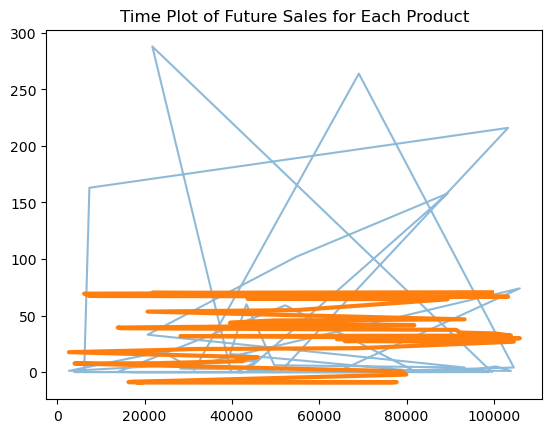

In [162]:
#Plotting of Forecasted Values
ax = y.plot(alpha=0.5)
ax = y_forecasted.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Future Sales for LOVELAND14SBTX');
#In data set many times there is no demand so forecasted linear regression plot come like this 

In [163]:
#Lag Feature 
df1["Lag_1"]= df1["MRP_FCST_QTY"].shift(1)
df1.head()

,MRP_FCST_QTY,Time,PRODUCT_ID,Lag_1
19280,0,4,62881,NaN
18031,0,80,62881,0.0
77146,0,81,62881,0.0
77281,0,82,62881,0.0
77359,0,83,62881,0.0


In [164]:
X1 = df1.loc[:,["Lag_1"]]#features
X1.dropna(inplace = True)#drop NaN values
y1 = df1.loc[:,"MRP_FCST_QTY"]
y1, X = y.align(X1, join = "inner")

model = LinearRegression()
model.fit(X1, y1)

y_predicted = pd.Series(model.predict(X1), index=X1.index)


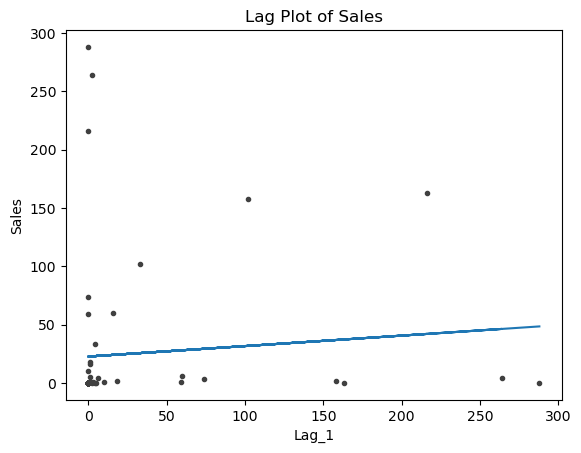

In [165]:
fig, p = plt.subplots()
p.plot(X1['Lag_1'], y1, '.', color='0.25')
p.plot(X1['Lag_1'], y_predicted)
p.set_ylabel('Sales')
p.set_xlabel('Lag_1')
p.set_title('Lag Plot of LOVELAND14SBTX Sales');